In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
from sklearn import metrics
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
#Read yelp.csv into a DataFrame.
yelp = pd.read_table("../../DAT-DC-10/data/yelp.csv", sep = ',')
yelp.shape

(10000, 10)

In [21]:
#Create a new DataFrame that only contains the 5-star and 1-star reviews.
yelp_reviews = yelp[(yelp.stars == 5) | (yelp.stars == 1)]
yelp_reviews.shape
yelp_reviews['stars'] = yelp_reviews.stars.map({1:0, 5:1})
yelp_reviews.head(30)

/Users/samsisto/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,1,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,1,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,1,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,1,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,1,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,1,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0
10,AsSCv0q_BWqIe3mX2JqsOQ,2010-06-16,E11jzpKz9Kw5K7fuARWfRw,1,The oldish man who owns the store is as sweet ...,review,-OMlS6yWkYjVldNhC31wYg,1,3,1
11,e9nN4XxjdHj4qtKCOPq_vg,2011-10-21,3rPt0LxF7rgmEUrznoH22w,1,Wonderful Vietnamese sandwich shoppe. Their ba...,review,C1rHp3dmepNea7XiouwB6Q,1,1,0
12,h53YuCiIDfEFSJCQpk8v1g,2010-01-11,cGnKNX3I9rthE0-TH24-qA,1,They have a limited time thing going on right ...,review,UPtysDF6cUDUxq2KY-6Dcg,1,2,0
17,O510Re68mOy9dU490JTKCg,2010-05-03,j4SIzrIy0WrmW4yr4--Khg,1,okay this is the best place EVER! i grew up sh...,review,u1KWcbPMvXFEEYkZZ0Yktg,0,0,0


In [22]:
#Split the new DataFrame into training and testing sets, using the review text as the only feature and the 
#star rating as the response.

X = yelp_reviews.text
y = yelp_reviews.stars

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [23]:
#Use CountVectorizer to create document-term matrices from X_train and X_test.
vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm

<3064x16612 sparse matrix of type '<type 'numpy.int64'>'
	with 237964 stored elements in Compressed Sparse Row format>

In [24]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1022x16612 sparse matrix of type '<type 'numpy.int64'>'
	with 76496 stored elements in Compressed Sparse Row format>

In [25]:
#Use Naive Bayes to predict the star rating for reviews in the testing set, and calculate the accuracy.
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
y_pred_class = nb.predict(X_test_dtm)

In [27]:
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.909980430528


In [29]:
#Calculate the AUC.
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob
print metrics.roc_auc_score(y_test, y_pred_prob)

0.938788659794


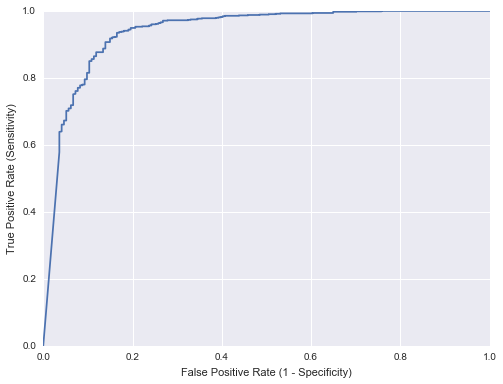

In [30]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [31]:
# confusion matrix
print metrics.confusion_matrix(y_test, y_pred_class)

[[118  76]
 [ 16 812]]


In [32]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1] #correctly predicted 5 star review
TN = confusion[0][0] #correctly predicted 1 star review
FP = confusion[0][1] #incorrectly predicted 5 star review, actually a 1 star review
FN = confusion[1][0] #incorrectly predicted 1 star review, actually a 5 star review

In [33]:
print 'True Positives:', TP
print 'True Negatives:', TN
print 'False Positives:', FP
print 'False Negatives:', FN

True Positives: 812
True Negatives: 118
False Positives: 76
False Negatives: 16


In [34]:
#sensitivity
print TP / float(TP+FN)

0.980676328502


In [35]:
#specificity
print TN / float(TN+FP)

0.60824742268


In [ ]:
#As we can see from the results for the calculation of the sensitivity and specificity, this model has a high
#sensitivity and a lower specificity. This high sensitivity quantifies how "badly" we want to avoid false negatives.
#In this case, we can see that this model does very well in terms of avoiding false negatives because we have a high
#sensitivity. On the contrary, our specificity is lower, meaning that we are not as apt to avoid false positives with
#this model. Looking at the calculations above, we can see that we have a high number of false positives out of the
#total number of 1-star reviews, leading to our lower specificity rating.

In [40]:
#Browse through the review text for some of the false positives and false negatives. Based on your knowledge of how
#Naive Bayes works, do you have any theories about why the model is incorrectly classifying these reviews?

#In terms of the false positives, most of the time it looks like the 1-star review includes a token or two that is highly
#correlated with a 5-star review. Eg. "I used to love that place...". The same goes for the false negatives. These 5-star
#reviews contain a few tokens that on their own, would indicate a 1 star review ("blows", "bad", "delayed"). But when you
#look at them in context, they actually indicate 5-star reviews ("blows its competition out of the water",
#"feel bad for other airlines", "delayed only twice").

#false positives
X_test[y_test < y_pred_class]
X_test[2462]

"Every time I've been there they have messed up my order in some way. The first time I ordered a sonic blast w Carmel. They charged me for Carmel but there was none in it plus the bottom of the cup was busted and my ice cream was leaking out. The next I went I ordered a reese sonic blast and a snickers, they were both snickers. Very upset I haven't been back and I love that place."

In [41]:
#false negatives
X_test[y_test > y_pred_class]
X_test[2902]

"Southwest blows its competitors so far out of the water I actually feel bad for the other airlines.  \n1. Of the countless times I've flown with them, my flight has been delayed only twice and both times less than one hour.\n2. NO BAG FEES.  \n3. Nine times out of ten the lowest price.\n4. Killer customer service, laced with sarcasm, veiled cynicism, and high efficiency.  I love it.\n5. They never give me an inquisitive look when I order a cocktail on the super early morning flights.  Thank you for not judging me, SW Flight Attendants."

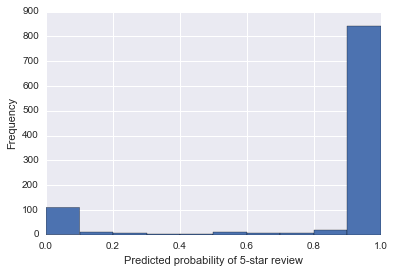

In [43]:
#Let's pretend that you want to balance sensitivity and specificity. You can achieve this by changing the threshold 
#for predicting a 5-star review. What threshold approximately balances sensitivity and specificity?

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y_pred_prob)
plt.xlim(0, 1)
plt.xlabel('Predicted probability of 5-star review')
plt.ylabel('Frequency')

In [62]:
# increase specificity by raising the threshold for predicting 5-star review
import numpy as np
y_pred_class = np.where(y_pred_prob > 0.99, 1, 0)
confusion2 = metrics.confusion_matrix(y_test, y_pred_class)
confusion2

array([[165,  29],
       [ 68, 760]])

In [63]:
TP2 = confusion2[1][1] #correctly predicted 5 star review
TN2 = confusion2[0][0] #correctly predicted 1 star review
FP2 = confusion2[0][1] #incorrectly predicted 5 star review, actually a 1 star review
FN2 = confusion2[1][0] #incorrectly predicted 1 star review, actually a 5 star review

In [64]:
#sensitivity
print TP2 / float(TP2+FN2)

0.917874396135


In [65]:
#specificity
print TN2 / float(TN2+FP2)

0.850515463918


In [66]:
#Let's see how well Naive Bayes performs when all reviews are included, rather than just 1-star and 5-star reviews:
X = yelp.text
y = yelp.stars

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [67]:
vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm

X_test_dtm = vect.transform(X_test)
X_test_dtm

<2500x25667 sparse matrix of type '<type 'numpy.int64'>'
	with 202057 stored elements in Compressed Sparse Row format>

In [68]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

In [69]:
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.4912


In [77]:
#null accuracy
y_test.value_counts().head(1) / len(y_test)

4    0.3628
Name: stars, dtype: float64

In [78]:
print metrics.confusion_matrix(y_test, y_pred_class)

[[ 55  18  18  68  15]
 [ 24  12  48 136  29]
 [  3   6  39 268  33]
 [ 10   1  23 642 231]
 [  4   0   4 333 480]]
